# 保存与加载模型


- save/load
- weight entire_model
- saved_model

---

### 保存参数

保存
```
model.save_weights(filename)
```

加载(需要保证模型一致)
```
model.load_weights(filename)
```

---

### 保存整个模型

> 优点是不需要在加载时定义模型;缺点是开销大一点

```
model.save(filename)

# 加载
network = tf.keras.models.load_model(filename)

```

---

### saved_model（标准协议，适用于实际生产环境）

```
# 保存
tf.saved_model.save(model,filename)
# 加载
imported = tf.saved_model.load(path)
```
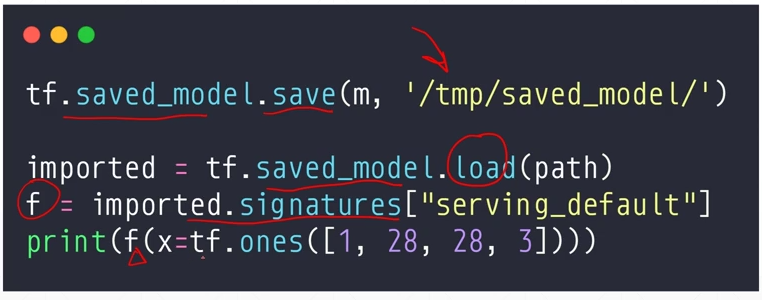


特点：
   - 模型保存跨语言、跨框架
   - python进行模型的训练与保存
   - c++读取模型并进行开发

In [1]:
# coding
# 训练一个网络
import tensorflow as tf
from tensorflow.keras import Sequential
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = tf.reshape(x_train,[-1,28*28])
x_test = tf.reshape(x_test,[-1,28*28])
x_train = tf.cast(x_train,dtype = tf.float32)
y_train = tf.cast(y_train,dtype = tf.int32)
x_test = tf.cast(x_test,dtype = tf.float32)
y_test = tf.cast(y_test,dtype = tf.int32)

db_train = tf.data.Dataset.from_tensor_slices((x_train,y_train))
db_train = db_train.shuffle(1000).batch(100)
db_test = tf.data.Dataset.from_tensor_slices((x_test,y_test))
db_test = db_test.shuffle(1000).batch(100)

model = Sequential([
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
model.fit(db_train, epochs=5)
model.evaluate(db_test)

Epoch 1/5
600/600 [==============================] - 2s 3ms/step - loss: 0.0214 - accuracy: 0.9952
Epoch 2/5
600/600 [==============================] - 2s 3ms/step - loss: 0.0154 - accuracy: 0.9971
Epoch 3/5
600/600 [==============================] - 2s 3ms/step - loss: 0.0115 - accuracy: 0.9977
Epoch 4/5
600/600 [==============================] - 2s 3ms/step - loss: 0.0091 - accuracy: 0.9981
Epoch 5/5
100/100 [==============================] - 0s 2ms/step - loss: 0.0802 - accuracy: 0.9785


[0.08019135895912768, 0.9785]

**出现错误的原因**

GPU显存没有得到释放

参考：
[问题解决办法](https://blog.csdn.net/Vinsuan1993/article/details/81142855)

In [23]:
# 保存模型

# 保存所有[w,b] 重新使用时需要原模型的搭建
import datetime
cur_time = datetime.datetime.now().strftime('%Y%m%d_%H%M%S')
cur_time
filename = './checkpoints/'+ cur_time
print(filename)
model.save_weights(filename)

./checkpoints/20190922_113000


In [24]:
# 加载网络
# 创建新网络
newmodel = Sequential([
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
newmodel.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
# 导入参数
newmodel.load_weights(filename)

In [26]:
newmodel.evaluate(db_test)

100/100 [==============================] - 1s 8ms/step - loss: 0.0802 - accuracy: 0.9737


[0.08019135895912768, 0.9785]

In [27]:
model.evaluate(db_test)

100/100 [==============================] - 0s 2ms/step - loss: 0.0802 - accuracy: 0.9785


[0.08019135895912768, 0.9785]